## Tents on 3D spatial domains

In [2]:
%matplotlib notebook
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [3]:
def getcommonvars(facetidx=9):
    fpts, dt = facetptsdts[facetidx]
    vertpos = pts[0]
    allpts = np.vstack((vertpos, fpts))
    V = allpts[1:,:]-allpts[:-1,:]

    al0 = +la.det(V[np.ix_([1,2],[1,2])])
    be0 = -la.det(V[np.ix_([1,2],[0,2])])
    ga0 = +la.det(V[np.ix_([1,2],[0,1])])

    al1 = - la.det(V[np.ix_([0,2],[1,2])])*V[1,3] + la.det(V[np.ix_([0,1],[1,2])])*V[2,3]
    be1 = + la.det(V[np.ix_([0,2],[0,2])])*V[1,3] - la.det(V[np.ix_([0,1],[0,2])])*V[2,3]
    ga1 = - la.det(V[np.ix_([0,2],[0,1])])*V[1,3] + la.det(V[np.ix_([0,1],[0,1])])*V[2,3]
    
    d0sq = al0*al0 + be0*be0 + ga0*ga0
    d1sq = al1*al1 + be1*be1 + ga1*ga1
    d10 = al0*al1 + be0*be1 + ga0*ga1

    e = -la.det(V[:3,:3])
    return fpts, dt, vertpos, allpts, V, al0, be0, ga0, al1, be1, ga1, e, d0sq, d1sq, d10


### Compute max $\overline{c}$ for a facet in spacetime

For each facet associated with the central vertex, we can compute a maximum wavespeed which depends on both the spatial geometry of the facet and the times of its vertices.

$$ \begin{align*} \frac{1}{\overline{c}^2} 
  &\ge \frac{d_0^2 d_1^2 - d_{10}^2}{e^2 d_0^2} \\
  &= \frac{(\alpha_0^2 + \beta_0^2 + \gamma_0^2)
  (\alpha_1^2 + \beta_1^2 + \gamma_1^2) -
(\alpha_0 \alpha_1 + \beta_0 \beta_1 + \gamma_0 \gamma_1)^2}
{e^2 (\alpha_0^2 + \beta_0^2 + \gamma_0^2)} \\
&= \frac{(\alpha_0 \beta_1 - \alpha_1 \beta_0)^2 + (\alpha_0 \gamma_1 -
\alpha_1 \gamma_0)^2 + (\beta_0 \gamma_1 - \beta_1 \gamma_0)^2}
{e^2(\alpha_0^2 + \beta_0^2 + \gamma_0^2)} \end{align*}$$

In 3D, the temporal and spatial components are tightly coupled and the inequality has so far resisted attempts at simplification.  For some spacetime configurations of facets the maximum wavespeed is infinite, for others it is finite.

By contrast, in 2D, the expression for the corresponding inequality simplfies to the following: There exists a time increment $dt$ for the central vertex of a tent satisfying
$$  \|\nabla f\| = \frac{1}{\overline{c}} $$
only if the 'slopes' of each of its opposite facets are less than or equal to $\frac{1}{\overline{c}}$, where the 'slope' is defined as the absolute value of the time difference of the endpoints of the facet (edge) divided by the spatial projection of the distance between them.


In [4]:
def compute_max_cbar(facetidx=9):
    data = getcommonvars(facetidx=facetidx)
    fpts, dt, vertpos, allpts, V, al0, be0, ga0, al1, be1, ga1, e, d0sq, d1sq, d10 = data
    trm1 = (d1sq)/(e*e)
    trm2 = d10*d10/(e*e)/d0sq
    denom = np.sqrt(trm1-trm2)
    max_cbar_for_facet = np.inf if abs(denom) < 1.0e-16 else 1./denom


    print("Computing max cbar for facet for existence of optimal dt" \
            .format(facetidx))
    print("allpts:\n", allpts)
    print("V:\n", V)
    print("al0:", al0)
    print("be0:", be0)
    print("ga0:", ga0)
    print("al1:", al1)
    print("be1:", be1)
    print("ga1:", ga1)
    print("e:", e)
    print("d0sq:", d0sq)
    print("d1sq:", d1sq)
    print("d10:", d10)
    print("trm1 d1sq/(e*e):", trm1)
    print("trm2 = d10*d10/(e*e)/d0sq:", trm2)
    print("denom", denom)
    print("max_cbar_for_facet:", max_cbar_for_facet)


## Compute a timestep
 Given a central vertex and a facet, compute a timestep for the central vertex such that
 $$\|\nabla f\| < \frac{1}{\overline{c}}$$
 We compute this for each facet opposite the vertex and take the mimimum as the proposed tent-pole height $\tilde{k}$, thus ensuring the max norm condition.

In [5]:
def compute_dt(facetidx=9):
    data = getcommonvars(facetidx=facetidx)
    fpts, dt, vertpos, allpts, V, al0, be0, ga0, al1, be1, ga1, e, d0sq, d1sq, d10 = data
    cbar = 1
    trm3 = d10/d0sq
    trm4 = (e*e/(cbar*cbar) - d1sq)/d0sq
    rootdisc = np.sqrt(trm3*trm3 + trm4)
    t10 = -trm3 - rootdisc
    t0 = allpts[0,3]
    t1 = allpts[1,3]
    dt = t1 - t10 - t0

    print("Computing dt for central vertex with respect to facet")
    print("trm3 = d10/d0sq:", trm3)
    print("trm4 = (e*e/(cbar*cbar) - d1sq)/d0sq:", trm4)
    print("rootdisc = sqrt(trm3*trm3 + trm4):", rootdisc)
    print("t10 = -trm3 - rootdisc:", t10)
    print("t0:", t0)
    print("t1:", t1)
    print("dt = t1 - t10 - t0:", dt)


### Load saved data
Load data exported during pitching of a 3D slab (after a number of tents had been pitched)

In [6]:
d = dict(np.load('taupts.npz', allow_pickle=True))
ar = d['ar']
v2v = d['v2v'].item()
vert = d['vert'].item()
dts = d['dts']
facets = d['facets'].tolist()

vs = ar[:,0].astype(int)
ts = ar[:,-2]
kts = ar[:,-1]

np.set_printoptions(precision=3)
facetpts = np.array([[ar[v, 1:5] for v in facet] for facet in facets])

facetptsdts = list(zip(facetpts, dts))
pts = [ar[vert,1:5]]
for nb in v2v[vert]:
    pts.append(ar[nb,1:5])

pts = np.array(pts)


### Visualize using scatter plot

<IPython.core.display.Javascript object>


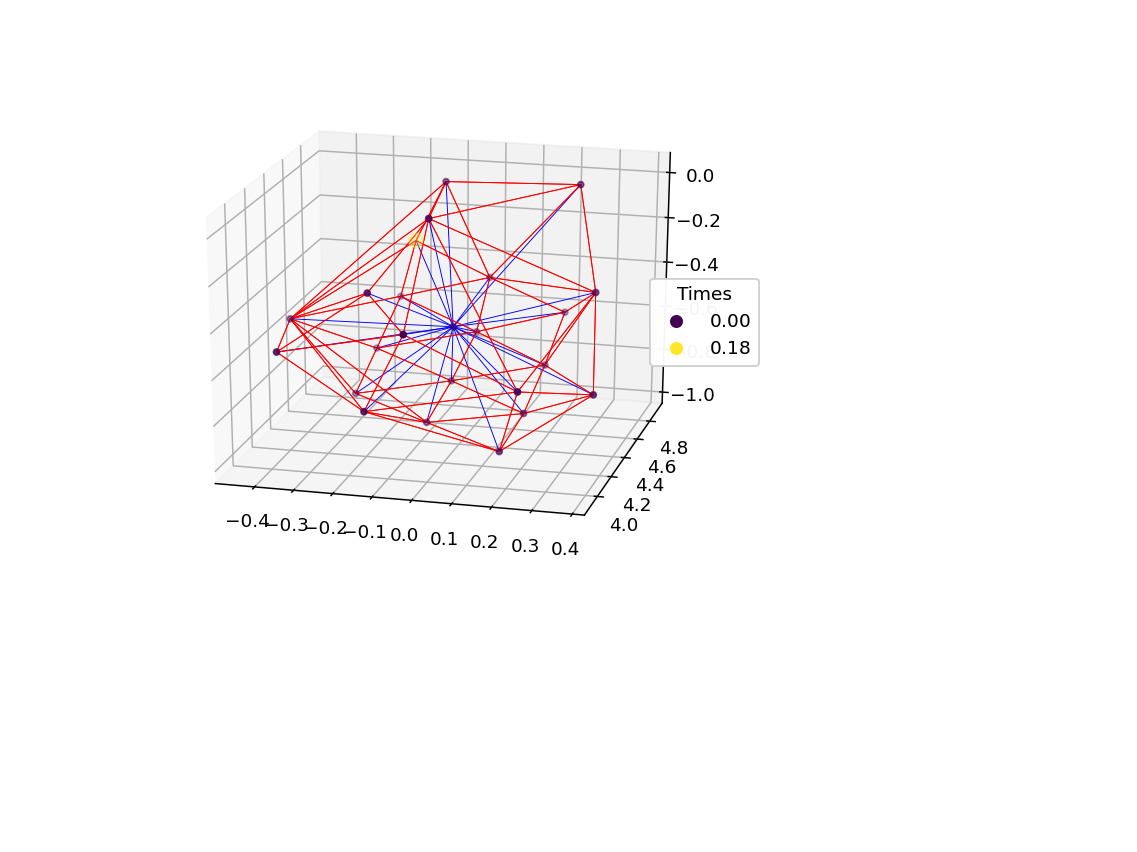

In [7]:
# 3D - scatter plot of central vertex and opposite facets
fig = plt.figure()
plt.ion()
ax = fig.add_subplot(111, projection='3d')
mint, maxt = min(pts[:,3]), max(pts[:,3])
for i in range(1,pts.shape[0]):
    ax.plot([pts[0,0], pts[i,0]], [pts[0,1], pts[i,1]],
            [pts[0,2], pts[i,2]], color='blue', linewidth=.5) 

for i, f in enumerate(facets):
    xs = [ar[v,1] for v in f] + [ar[f[0],1]]
    ys = [ar[v,2] for v in f] + [ar[f[0],2]]
    zs = [ar[v,3] for v in f] + [ar[f[0],3]]
    ax.plot(xs, ys, zs, color='red', linewidth=.5)

scatter = ax.scatter(pts[:,0], pts[:,1], pts[:,2], c=pts[:,3], s=10 + 50*pts[:,3]/(maxt-mint))

legend = ax.legend(*scatter.legend_elements(),
                    loc="right", title="Times")
ax.add_artist(legend);



### A problematic vertex

This central vertex has a minimal time value among its neighbor vertices and yet we are unable to pitch a tent here at this time!  This almost never happens in the 2D case and never happens in the 1D case.  It is fairly common in the 3D case.  We may need to allow the algorithm to relax our condition for "good progress" in 3D if the tent slab is tall or we can get incomplete slabs.

Some facets are better than others.  For these data, facet 9 gives zero dt.  facet 2 gives a good dt.

#### Let's print the intermediate calculation results to gain some insight

In [13]:
compute_max_cbar(facetidx=9)

Computing max cbar for facet for existence of optimal dt
allpts:
 [[0.258 0.722 0.216 0.   ]
 [0.333 1.    0.    0.249]
 [0.498 0.777 0.    0.182]
 [0.247 0.748 0.    0.   ]]
V:
 [[ 0.075  0.278 -0.216  0.249]
 [ 0.164 -0.223  0.    -0.067]
 [-0.251 -0.029  0.    -0.182]]
al0: 0.0
be0: -0.0
ga0: -0.06076533782107648
al1: 0.008354613429579376
be1: 0.010073592977289558
ga1: 0.015897693232341102
e: -0.013109286479513706
d0sq: 0.003692426280509548
d1sq: 0.0004240134911394297
d10: -0.0009660286998390483
trm1 d1sq/(e*e): 2.467297771664534
trm2 = d10*d10/(e*e)/d0sq: 1.4706526718235524
denom 0.9983211406361089
max_cbar_for_facet: 1.0016816826725932


#### Note that the maximum wavespeed for this facet is close to the current wavespeed.

In [14]:
compute_dt(facetidx=9)

Computing dt for central vertex with respect to facet
trm3 = d10/d0sq: -0.26162437011626355
trm4 = (e*e/(cbar*cbar) - d1sq)/d0sq: -0.06829116683208938
rootdisc = sqrt(trm3*trm3 + trm4): 0.012495767549145179
t10 = -trm3 - rootdisc: 0.24912860256711838
t0: 0.0
t1: 0.2491286025671174
dt = t1 - t10 - t0: -9.71445146547012e-16


#### The time increment is zero, so we cannot pitch a tent at this vertex at this time.

## Tent pitching algorithm

### Initialization
* let the wavespeed $\overline{c}$ and slabheight be given.
* Let `tau` be the collection of current times for each vertex,
    initially all zero
* Let `vertdts` be a collection of reference heights (dt values) for each
    vertex.  These time increments are currently computed by dividing each edge length adjacent to the vertex by
    the wavespeed and taking the minimum.  These can instead be computed optimally using the proposed new algorithm.
* Let `ktilde` be a collection of the current planned heights (dt values) for each vertex.  Initially this is a copy of `vertdts`
* Let `ready_vs` be a collection of vertices for which good
    progress can be made.
* Let `vs_level` be the collection containing the level (layer) for each
    vertex

### Main Loop (current implementation)

while `ready_vs` is not an empty collection, perform the following steps:

* Set minlevel to a large value.
* Choose a tent vertex `vert` with minimal level (layer) and remove it from the `ready_vs` collection.  It will be the central vertex for the tent.
* Update `minlevel` to the level of the vertex chosen.
* Construct the tent with 
   * bottom time `tent.tbot` equal to its `tau` value
   * top time `tent.ttop` equal to:
     min{`slabheight`, `tent.tbot` + `ktilde[vert]`},
   * level equal to the central `vert`'s `vs_level` value.
   * neighbor vertices
   * neighbor times
* Append the new tent to the slab collection.
* Update the value of `tau` for the selected vertex to the `tent.ttop` time.
* Update the levels of the neighbor vertices to be one more than the tent's level.
* Update the `ktilde` value for each neighbor vertex that hasn't reached the final slab time. This is currently done by computing the differences in `tau` values between the neighbor vertex and each of its neighbors, then adding the edge time (edge length/wavespeed). 
* This could instead be computed using the proposed algorithm for facet dts.
* If such a vertex is not in `ready_vs`, but is now considered to be able to make good progress (i.e. its `ktilde` is more than half its `vertdts` reference value), add it to `ready_vs`.

### Proposed Modifications

* Use an algorithm which ensures that the norm of the gradient of `tau` never exceeds $\frac{1}{\overline{c}}$
* In addition to *adding* neighbor vertices which are now able to make good progress, we should *remove* neighbor vertices which are no longer able to make good progress (e.g. `ktilde` < 1/4 `vs_level`)
* Change the stopping criterion to ensure that the slab is completed.
* Add a heuristic to relax the "good progress" constraint in case no `ready_vs` have sufficiently large `ktilde` values to meet the condition.  The constraint could be strengthened if the number of `ready_vs` grew large.
